### 1. Import and read the data

In [1304]:
# import the data
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram 
from scipy.cluster.hierarchy import cut_tree
df=pd.read_csv(r"C:\Users\Administrator\Downloads\Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [1305]:
# Checking the count of each country
df.country.value_counts()

United Arab Emirates              1
Chad                              1
Estonia                           1
Nigeria                           1
Sierra Leone                      1
Colombia                          1
Austria                           1
Fiji                              1
Maldives                          1
Tunisia                           1
Hungary                           1
Tajikistan                        1
Argentina                         1
Oman                              1
Sri Lanka                         1
Peru                              1
Guyana                            1
Slovenia                          1
Madagascar                        1
Panama                            1
Russia                            1
Paraguay                          1
Kyrgyz Republic                   1
Israel                            1
Iran                              1
Uganda                            1
Malaysia                          1
Cote d'Ivoire               

In [1306]:
# Finding the shape of the data (number of rows and columns)
df.shape

(167, 10)

In [1307]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [1308]:
# info of the columns like dtypes,memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 12.4+ KB


In [1309]:
# converting expotrs, imports and health column from percentage values.
df['exports'] = (df['exports']/100)*df['gdpp']
df['imports']=(df['imports']/100)*df['gdpp']
df['health']=(df['health']/100)*df['gdpp']
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [1310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 12.4+ KB


In [1311]:
# Popping out the country column from the data
y=df.pop('country')

In [1312]:
df11=pd.concat([df,y],axis=1)
df11.shape

(167, 10)

In [1313]:
# Finding number of nulls for columns
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### 2. Outlier treatment

In [1314]:
# finding outliers
df=df[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]
df.describe(percentiles=[.25,.50,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


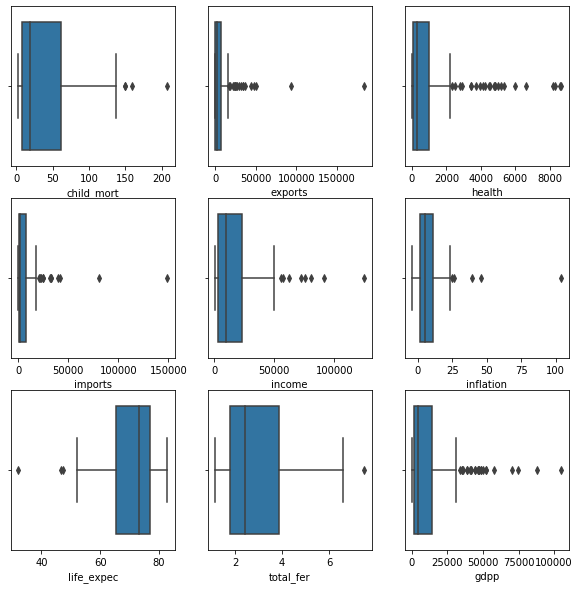

In [1315]:
# Finding outliers by visualization using 'BOXPLOTS'
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.boxplot(df['child_mort'])
plt.subplot(3,3,2)
sns.boxplot(df['exports'])
plt.subplot(3,3,3)
sns.boxplot(df['health'])
plt.subplot(3,3,4)
sns.boxplot(df['imports'])
plt.subplot(3,3,5)
sns.boxplot(df['income'])
plt.subplot(3,3,6)
sns.boxplot(df['inflation'])
plt.subplot(3,3,7)
sns.boxplot(df['life_expec'])
plt.subplot(3,3,8)
sns.boxplot(df['total_fer'])
plt.subplot(3,3,9)
sns.boxplot(df['gdpp'])

In [1316]:
# Treating outliers

q1=df['child_mort'].quantile(0.00)
q4=df['child_mort'].quantile(0.99)
df=df[(df['child_mort']>=q1) & (df['child_mort']<=q4)]

q1=df['exports'].quantile(0.00)
q4=df['exports'].quantile(0.99)
df=df[(df['exports']>=q1) & (df['exports']<=q4)]

q1=df['imports'].quantile(0.00)
q4=df['imports'].quantile(0.99)
df=df[(df['imports']>=q1) & (df['imports']<=q4)]

q1=df['income'].quantile(0.00)
q4=df['income'].quantile(0.99)
df=df[(df['income']>=q1) & (df['income']<=q4)]


q1=df['inflation'].quantile(0.00)
q4=df['inflation'].quantile(0.99)
df=df[(df['inflation']>=q1) & (df['inflation']<=q4)]

q1=df['total_fer'].quantile(0.00)
q4=df['total_fer'].quantile(0.99)
df=df[(df['total_fer']>=q1) & (df['total_fer']<=q4)]

q1=df['gdpp'].quantile(0.00)
q4=df['gdpp'].quantile(0.99)
df=df[(df['gdpp']>=q1) & (df['gdpp']<=q4)]




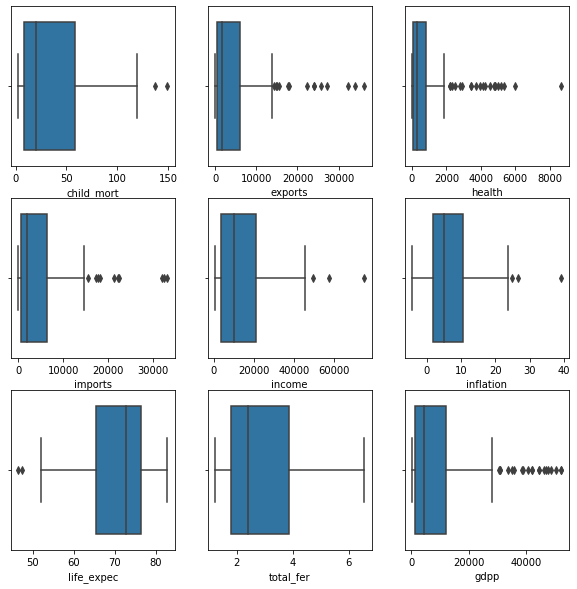

In [1317]:
# Finding outliers by visualization using 'BOXPLOTS'
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.boxplot(df['child_mort'])
plt.subplot(3,3,2)
sns.boxplot(df['exports'])
plt.subplot(3,3,3)
sns.boxplot(df['health'])
plt.subplot(3,3,4)
sns.boxplot(df['imports'])
plt.subplot(3,3,5)
sns.boxplot(df['income'])
plt.subplot(3,3,6)
sns.boxplot(df['inflation'])
plt.subplot(3,3,7)
sns.boxplot(df['life_expec'])
plt.subplot(3,3,8)
sns.boxplot(df['total_fer'])
plt.subplot(3,3,9)
sns.boxplot(df['gdpp'])

In [1318]:
df.shape

(153, 9)

### 3. Principal Component Analysis (PCA)

In [1319]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df1=scaler.fit_transform(df)

In [1320]:
df1[:4,:4]

array([[ 1.53440229, -0.66935581, -0.57704956, -0.69332369],
       [-0.56284574, -0.51415354, -0.42221439, -0.41766072],
       [-0.25794691, -0.43334982, -0.47833948, -0.51073469],
       [ 2.35506456, -0.36406487, -0.53683804, -0.49267932]])

In [1321]:
# maximun value
df1.max()

5.330348737906392

In [1322]:
# Finding the variance of each column
round(100*df.var()/sum(df.var()),3)

child_mort     0.000
exports       10.414
health         0.450
imports        8.408
income        41.962
inflation      0.000
life_expec     0.000
total_fer      0.000
gdpp          38.765
dtype: float64

In [1323]:
# Importing the PCA module
from sklearn.decomposition import PCA
pca=PCA(random_state=42)
pca.fit(df1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [1324]:
pca.components_

array([[-0.31761954,  0.3541788 ,  0.34639375,  0.36329315,  0.37445945,
        -0.17160572,  0.34110955, -0.30060266,  0.38120674],
       [ 0.48705831,  0.32903905,  0.24898358,  0.27920029,  0.16739444,
         0.17712242, -0.3580047 ,  0.51465442,  0.2492631 ],
       [-0.17374935,  0.07551921, -0.1351091 , -0.02505116,  0.18796443,
         0.93867425,  0.15171734, -0.07232849, -0.02316117],
       [ 0.02718523, -0.50026918,  0.61122738, -0.46243946,  0.05934227,
         0.1055414 ,  0.13069413,  0.1200509 ,  0.33968939],
       [ 0.05436275, -0.05237675,  0.03628019, -0.14622768,  0.30361077,
         0.02613211, -0.71532375, -0.60048423,  0.08044136],
       [ 0.0865306 , -0.01984826, -0.45013055, -0.35348445,  0.72693149,
        -0.20698885,  0.16000715,  0.24722214,  0.08096227],
       [-0.78658965, -0.01606551,  0.01699355,  0.00150181,  0.02942938,
        -0.04467567, -0.4204996 ,  0.44778947,  0.02302736],
       [ 0.00403169,  0.12194324,  0.46616092, -0.05462716,  0

In [1325]:
pca.explained_variance_ratio_

array([0.64952006, 0.15347751, 0.09738414, 0.04704913, 0.02076085,
       0.01872978, 0.00969553, 0.00218929, 0.00119372])

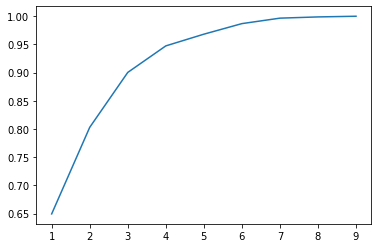

In [1326]:
# Plotting the scree plot
var_cumm=np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumm)+1,),var_cumm)

In [1327]:
# Number of PC'S we can go with are 4 which gives 95% approx..

In [1328]:
# performing dimentionality reduction
from sklearn.decomposition import IncrementalPCA
pca_final=IncrementalPCA(n_components=4)

In [1329]:
# Transform the data
df_pca=pca_final.fit_transform(df1)
df_pca.shape

(153, 4)

In [1330]:
# Creating a dataframe with PC's obtained
df_pca2=pd.DataFrame(df_pca,columns=['PC1','PC2','PC3','PC4'])
df_pca2.head()

,PC1,PC2,PC3,PC4
0,-3.071109,1.571667,-0.471527,0.084431
1,-0.044506,-1.612398,-0.111548,-0.055863
2,-0.614567,-0.705871,1.413459,0.239088
3,-3.168731,2.525651,1.268524,0.278496
4,1.113955,-0.855659,-0.416315,-0.307697


In [1331]:
# Adding country column to the principal components
df_pca3= pd.concat([df_pca2,y],axis=1)
df_pca3.head()

,PC1,PC2,PC3,PC4,country
0,-3.071109,1.571667,-0.471527,0.084431,Afghanistan
1,-0.044506,-1.612398,-0.111548,-0.055863,Albania
2,-0.614567,-0.705871,1.413459,0.239088,Algeria
3,-3.168731,2.525651,1.268524,0.278496,Angola
4,1.113955,-0.855659,-0.416315,-0.307697,Antigua and Barbuda


In [1332]:
df_pca3 = df_pca3[['country', 'PC1', 'PC2', 'PC3', 'PC4']]
df_pca3.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-3.071109,1.571667,-0.471527,0.084431
1,Albania,-0.044506,-1.612398,-0.111548,-0.055863
2,Algeria,-0.614567,-0.705871,1.413459,0.239088
3,Angola,-3.168731,2.525651,1.268524,0.278496
4,Antigua and Barbuda,1.113955,-0.855659,-0.416315,-0.307697


In [1333]:
df_pca4 = df_pca3.dropna(how='any', subset=['PC1','PC2','PC3','PC4','country'])
df_pca4.shape

(153, 5)

In [1334]:
df_pca4.columns

Index(['country', 'PC1', 'PC2', 'PC3', 'PC4'], dtype='object')

In [1335]:
# Hopkins statistic
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [1336]:
# Checking hopkins measure
hopkins(df_pca4.drop('country',axis=1))

0.8671978079328717

In [1337]:
# For performing clustering we need to drop the country column
df3 = df_pca4.drop('country', axis = 1)
df3.head()

,PC1,PC2,PC3,PC4
0,-3.071109,1.571667,-0.471527,0.084431
1,-0.044506,-1.612398,-0.111548,-0.055863
2,-0.614567,-0.705871,1.413459,0.239088
3,-3.168731,2.525651,1.268524,0.278496
4,1.113955,-0.855659,-0.416315,-0.307697


### 4. K-Means Clustering

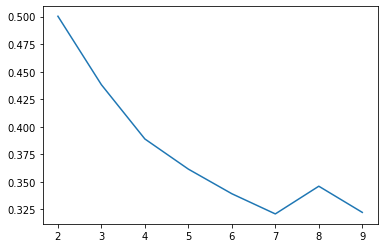

In [1338]:
# silhouette score plot
from sklearn.metrics import silhouette_score
ss=[]
for k in range(2,10):
    kmeans = KMeans(n_clusters=k).fit(df3)
    ss.append([k,silhouette_score(df3,kmeans.labels_)])
plt.plot(pd.DataFrame(ss)[0],pd.DataFrame(ss)[1])

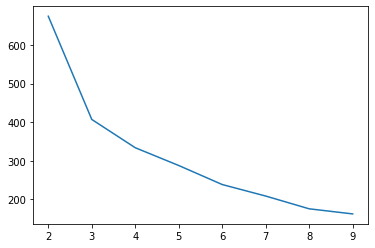

In [1339]:
# Elbow curve method
ssd=[]
for k in range(2,10):
    kmeans = KMeans(n_clusters=k).fit(df3)
    ssd.append([k,kmeans.inertia_])
plt.plot(pd.DataFrame(ssd)[0],pd.DataFrame(ssd)[1])

In [1340]:
# performing kmeans using k=3
model1_kmean= KMeans(n_clusters=3, random_state=50)
model1_kmean.fit(df3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [1341]:
df_pca4.columns

Index(['country', 'PC1', 'PC2', 'PC3', 'PC4'], dtype='object')

In [1342]:
# Adding clusterID to the PCs data
data_km=pd.concat([df_pca4.reset_index().drop('index',axis=1),pd.Series(model1_kmean.labels_).reset_index().drop('index',axis=1)],axis=1)
data_km.columns=['country','PC1','PC2','PC3','PC4','ClusterID']
data_km.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-3.071109,1.571667,-0.471527,0.084431,2
1,Albania,-0.044506,-1.612398,-0.111548,-0.055863,0
2,Algeria,-0.614567,-0.705871,1.413459,0.239088,0
3,Angola,-3.168731,2.525651,1.268524,0.278496,2
4,Antigua and Barbuda,1.113955,-0.855659,-0.416315,-0.307697,0


In [1343]:
# Checking the count of the clusters that are formed
data_km['ClusterID'].value_counts()

0    79
2    45
1    29
Name: ClusterID, dtype: int64

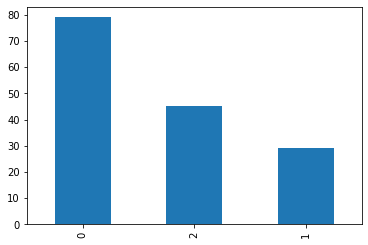

In [1344]:
# plotting the bar graph
data_km['ClusterID'].value_counts().plot(kind='bar')

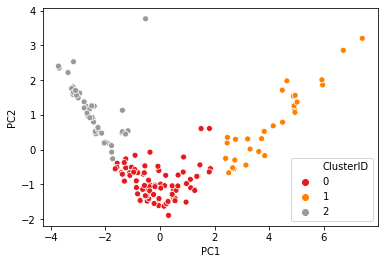

In [1345]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',data=data_km,palette='Set1')

### 5. Cluster profiling K-Means

In [1346]:
# Merging with the original data
data1=pd.merge(df11,data_km[['country','ClusterID']],on='country')
data1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,ClusterID
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,Afghanistan,2
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,Albania,0
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,Algeria,0
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,Angola,2
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,Antigua and Barbuda,0


In [1347]:
data1=data1.drop(['exports','health','imports','inflation','life_expec','total_fer'],axis=1)

In [1348]:
data1.head()

,child_mort,income,gdpp,country,ClusterID
0,90.2,1610,553,Afghanistan,2
1,16.6,9930,4090,Albania,0
2,27.3,12900,4460,Algeria,0
3,119.0,5900,3530,Angola,2
4,10.3,19100,12200,Antigua and Barbuda,0


In [1349]:
data11 = data1[['country', 'child_mort', 'income', 'gdpp', 'ClusterID']]
data11.head()

,country,child_mort,income,gdpp,ClusterID
0,Afghanistan,90.2,1610,553,2
1,Albania,16.6,9930,4090,0
2,Algeria,27.3,12900,4460,0
3,Angola,119.0,5900,3530,2
4,Antigua and Barbuda,10.3,19100,12200,0


In [1350]:
data11.shape

(153, 5)

### 6. Analysis of the clusters K-Means

In [1351]:
data11.drop('country',axis=1).groupby('ClusterID').mean()

,child_mort,income,gdpp
ClusterID,,,
0,37.240506,16770.037975,12291.784810
1,39.400000,21441.379310,18267.551724
2,41.237778,15177.555556,10874.866667


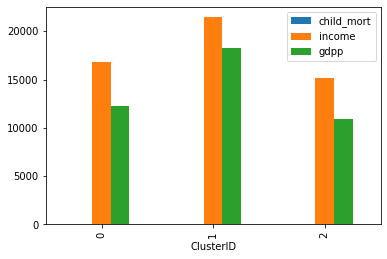

In [1352]:
# plotting
data11[['child_mort','income','gdpp','ClusterID']].groupby('ClusterID').mean().plot(kind='bar')

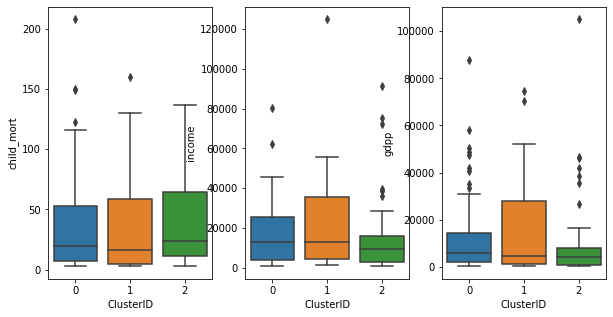

In [1353]:
plt.figure(figsize=(10,5))
var=['child_mort','income','gdpp']
for i in enumerate(var):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(x='ClusterID',y=i[1],data=data11)

In [1374]:
# Concept of binning
data11[data11['ClusterID']==2]['country']

0          Afghanistan
3               Angola
17               Benin
21            Botswana
24            Bulgaria
25        Burkina Faso
27            Cambodia
30          Cape Verde
34               China
35            Colombia
36             Comoros
38         Congo, Rep.
46             Ecuador
47               Egypt
52                Fiji
53             Finland
56              Gambia
60              Greece
61             Grenada
68             Iceland
75               Italy
76             Jamaica
79          Kazakhstan
82              Kuwait
83     Kyrgyz Republic
87             Lesotho
88             Liberia
91          Luxembourg
93          Madagascar
97                Mali
100          Mauritius
102            Moldova
107            Myanmar
116           Pakistan
119               Peru
124            Romania
125             Russia
130             Serbia
133          Singapore
134    Slovak Republic
136    Solomon Islands
137       South Africa
142              Sudan
151        

### 7. Hierarchical Clustering

In [1355]:
df_pca2.head()

,PC1,PC2,PC3,PC4
0,-3.071109,1.571667,-0.471527,0.084431
1,-0.044506,-1.612398,-0.111548,-0.055863
2,-0.614567,-0.705871,1.413459,0.239088
3,-3.168731,2.525651,1.268524,0.278496
4,1.113955,-0.855659,-0.416315,-0.307697


In [1356]:
data_km.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-3.071109,1.571667,-0.471527,0.084431,2
1,Albania,-0.044506,-1.612398,-0.111548,-0.055863,0
2,Algeria,-0.614567,-0.705871,1.413459,0.239088,0
3,Angola,-3.168731,2.525651,1.268524,0.278496,2
4,Antigua and Barbuda,1.113955,-0.855659,-0.416315,-0.307697,0


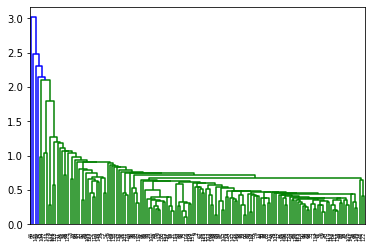

In [1357]:
# Single Linkage
mergings=linkage(df_pca2,method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

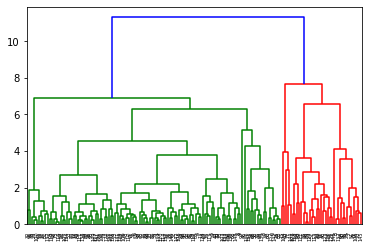

In [1358]:
# complete linkage
mergings=linkage(df_pca2,method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [1386]:
# For 3 clusters
cluster_labels=cut_tree(mergings,n_clusters=3).reshape(-1,)
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0])

In [1387]:
# Assigning cluster labels
data_km['cluster_labels'] = cluster_labels
data_km.head()

,country,PC1,PC2,PC3,PC4,ClusterID,cluster_labels
0,Afghanistan,-3.071109,1.571667,-0.471527,0.084431,2,0
1,Albania,-0.044506,-1.612398,-0.111548,-0.055863,0,0
2,Algeria,-0.614567,-0.705871,1.413459,0.239088,0,0
3,Angola,-3.168731,2.525651,1.268524,0.278496,2,0
4,Antigua and Barbuda,1.113955,-0.855659,-0.416315,-0.307697,0,0


In [1388]:
# Checking the count of the clusters that are formed
data_km['cluster_labels'].value_counts()

0    116
1     32
2      5
Name: cluster_labels, dtype: int64

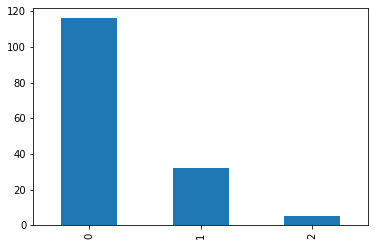

In [1389]:
# plotting the bar graph
data_km['cluster_labels'].value_counts().plot(kind='bar')

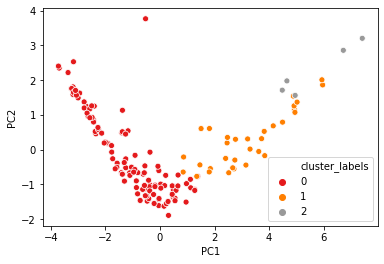

In [1390]:
# plotting the clusters with the clusters obtained
sns.scatterplot(x='PC1',y='PC2',hue='cluster_labels',data=data_km,palette='Set1')

### 8. Cluster profiling Hierarchial clustering

In [1391]:
# Merging with the original data
data2=pd.merge(df11,data_km,on='country')
data2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,PC1,PC2,PC3,PC4,ClusterID,cluster_labels
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,Afghanistan,-3.071109,1.571667,-0.471527,0.084431,2,0
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,Albania,-0.044506,-1.612398,-0.111548,-0.055863,0,0
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,Algeria,-0.614567,-0.705871,1.413459,0.239088,0,0
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,Angola,-3.168731,2.525651,1.268524,0.278496,2,0
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,Antigua and Barbuda,1.113955,-0.855659,-0.416315,-0.307697,0,0


In [1392]:
data2.shape

(153, 16)

In [1393]:
data2=data2.drop(['exports','health','imports','inflation','life_expec','total_fer','PC1','PC2','PC3','PC4'],axis=1)

In [1394]:
data2.head()

,child_mort,income,gdpp,country,ClusterID,cluster_labels
0,90.2,1610,553,Afghanistan,2,0
1,16.6,9930,4090,Albania,0,0
2,27.3,12900,4460,Algeria,0,0
3,119.0,5900,3530,Angola,2,0
4,10.3,19100,12200,Antigua and Barbuda,0,0


In [1395]:
data2 = data2[['country', 'child_mort', 'income', 'gdpp', 'ClusterID','cluster_labels']]

In [1396]:
data2.head()

,country,child_mort,income,gdpp,ClusterID,cluster_labels
0,Afghanistan,90.2,1610,553,2,0
1,Albania,16.6,9930,4090,0,0
2,Algeria,27.3,12900,4460,0,0
3,Angola,119.0,5900,3530,2,0
4,Antigua and Barbuda,10.3,19100,12200,0,0


### 9. Analysis of the clusters Hierarchial clustering

In [1397]:
data2.drop('country',axis=1).groupby('cluster_labels').mean()

,child_mort,income,gdpp,ClusterID
cluster_labels,,,,
0,38.233621,16529.698276,12206.836207,0.775862
1,46.165625,17718.062500,13186.437500,0.750000
2,5.580000,29040.000000,30444.000000,1.000000


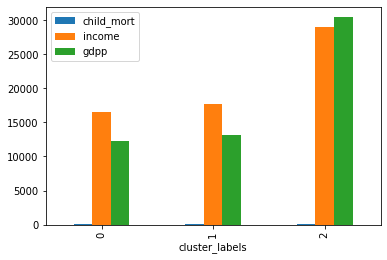

In [1402]:
# plotting
data2=data2.drop('ClusterID',axis=1)
data2.drop('country',axis=1).groupby('cluster_labels').mean().plot(kind='bar')

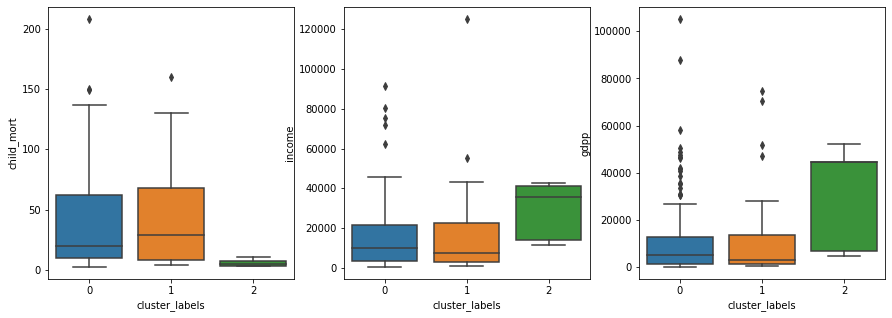

In [1403]:
plt.figure(figsize=(15,5))
var=['child_mort','income','gdpp']
for i in enumerate(var):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(x='cluster_labels',y=i[1],data=data2)

In [1404]:
# Concept of binning
data2[data2['cluster_labels']==0]['country']

0                         Afghanistan
1                             Albania
2                             Algeria
3                              Angola
4                 Antigua and Barbuda
5                           Argentina
6                             Armenia
9                          Azerbaijan
12                         Bangladesh
13                           Barbados
14                            Belarus
16                             Belize
17                              Benin
18                             Bhutan
19                            Bolivia
20             Bosnia and Herzegovina
21                           Botswana
22                             Brazil
23                             Brunei
24                           Bulgaria
25                       Burkina Faso
26                            Burundi
27                           Cambodia
29                             Canada
30                         Cape Verde
31           Central African Republic
32          

In [1405]:
# Finally the contries that requires the help highly are....
0          Afghanistan
3               Angola
17               Benin
21            Botswana
24            Bulgaria
25        Burkina Faso
27            Cambodia
30          Cape Verde
34               China
35            Colombia
36             Comoros
38         Congo, Rep.
46             Ecuador
47               Egypt
52                Fiji
53             Finland
56              Gambia
60              Greece
61             Grenada
68             Iceland
75               Italy
76             Jamaica
79          Kazakhstan
82              Kuwait
83     Kyrgyz Republic
87             Lesotho
88             Liberia
91          Luxembourg
93          Madagascar
97                Mali
100          Mauritius
102            Moldova
107            Myanmar
116           Pakistan
119               Peru
124            Romania
125             Russia
130             Serbia
133          Singapore
134    Slovak Republic
136    Solomon Islands
137       South Africa
142              Sudan
151              Tonga
152            Tunisi

SyntaxError: invalid syntax (<ipython-input-1405-415c5f1b203c>, line 2)